#### Recap, double slit (point sources)

In [1]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, Ellipse, Circle
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
np.random.seed(42)
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
plt.style.use('dark_background')

In [2]:
def double_slit_setup(ax, x, title):

    # add slits, screen, and horizontal line
    ax.plot([-5, 0], [0, 0], 'w--')
    ax.plot([-5,-5], [3, 0.6], 'w', linewidth=2)
    ax.plot([-5,-5], [0.4, -0.4], 'w', linewidth=2)
    ax.plot([-5,-5], [-0.6, -3], 'w', linewidth=2)
    ax.plot([0,0], [3, -3], 'w', linewidth=2)

    # slit-screen distance
    ax.plot([-5, -0], [-2, -2], 'w-', linewidth=1)
    ax.text(-2.5, -2.3, r'$L$', horizontalalignment='center', verticalalignment='center', fontsize=12, color='w')
    ax.arrow(-5+0.3, -2, -0.001, 0,  head_width=0.1, head_length=0.3, fc='w', ec='none')
    ax.arrow(0-0.3, -2, 0.001, 0,  head_width=0.1, head_length=0.3, fc='w', ec='none')

    # # slit-slit distance
    ax.plot([-5.5, -3], [0.5, 0.5], 'w--', linewidth=1)
    ax.plot([-5.5, -3], [-0.5, -0.5], 'w--', linewidth=1)
    ax.plot([-5.2, -5.2], [0.5, -0.5], 'w-', linewidth=1)
    ax.text(-5.5, 0, r'$d$', horizontalalignment='center', verticalalignment='center', fontsize=12, color='w')
    ax.arrow(-5.2, 0.5-0.3, 0, 0,  head_width=0.1, head_length=0.3, fc='w', ec='none')
    ax.arrow(-5.2, -0.5+0.3, 0, -0.001,  head_width=0.1, head_length=0.3, fc='w', ec='none')

    # two rays
    ax.plot([-5, 0], [0.5, x], 'r-', linewidth=2)
    ax.plot([-5, 0], [-0.5, x], 'c-', linewidth=2)
    ax.text(0.3, x, r'$x$', horizontalalignment='center', verticalalignment='center', fontsize=12, color='w')

    # two theta
    if x > 0.5:
        arc_theta_1 = Arc([-5, 0.5], 3, 3, theta1=0, theta2=np.rad2deg(np.arctan2(x-0.5, 5)), color='r', linewidth=2)
        arc_theta_2 = Arc([-5, -0.5], 3, 3, theta1=0, theta2=np.rad2deg(np.arctan2(x+0.5, 5)), color='c', linewidth=2)
    elif x < -0.5:
        arc_theta_1 = Arc([-5, 0.5], 3, 3, theta1=-np.rad2deg(np.arctan2(-x+0.5, 5)), theta2=0, color='r', linewidth=2)
        arc_theta_2 = Arc([-5, -0.5], 3, 3, theta1=-np.rad2deg(np.arctan2(-x-0.5, 5)), theta2=0, color='c', linewidth=2)
    else:
        arc_theta_1 = Arc([-5, 0.5], 3, 3, theta1=-np.rad2deg(np.arctan2(0.5-x, 5)), theta2=0, color='r', linewidth=2)
        arc_theta_2 = Arc([-5, -0.5], 3, 3, theta1=0, theta2=np.rad2deg(np.arctan2(0.5+x, 5)), color='c', linewidth=2)
    ax.add_patch(arc_theta_1)
    ax.add_patch(arc_theta_2)
    ax.text(-2.5, 0.5, r'$\theta_1$', horizontalalignment='center', verticalalignment='center', fontsize=12, color='r')
    ax.text(-2.5, -0.5, r'$\theta_2$', horizontalalignment='center', verticalalignment='center', fontsize=12, color='c')


    ax.set_xlim(-6, 1)
    ax.set_ylim(-3, 2)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel('z')
    ax.set_ylabel('x')
    # ax.legend()

    # ax.grid(True)
    # ax.axis('off')
    if title:
        ax.set_title(title, fontsize=12)

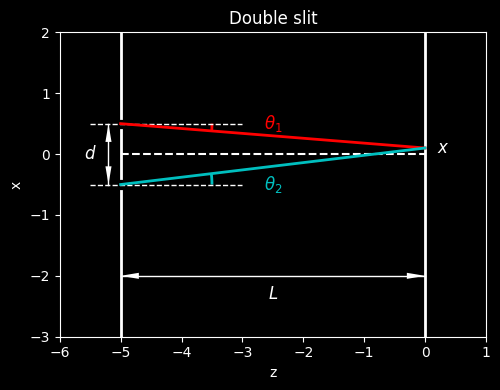

In [3]:
fig_1, ax_1 = plt.subplots(figsize=(8,4))
double_slit_setup(ax_1, x=0.1, title='Double slit')

plt.tight_layout()
plt.show()

Under `paraxial approximation` (i.e., $L \gg d, x$) and point source assumption, we can use `two` methods to derive interference pattern at location $x$ on screen

The first is approximating spherical waves arriving at $x$ as `plane waves`, take the sum, and take the modulus squared as intensity

$$\begin{align*}I(x, z=0)&=|U_1(x,0)+U_2(x,0)|^2\\
&=4\cos^2\left(\frac{\pi d}{\lambda L}x\right)
\end{align*}$$


So, condition for `constructive interference` is

$$\boxed{x=m\frac{\lambda L}{d}}$$

and for `destructive interference`

$$x=\left(m+\frac{1}{2}\right)\frac{\lambda L}{d}$$

`Alternatively`, we can just consider the locations on the screen for constructive and destructive interference by analyzing the difference in two ray paths, assuming they are `parallel` under paraxial approximation

$$\delta=d\sin \theta\approx d\frac{x}{L}$$

Then, obviously, for `constructive` pattern

$$\delta=m\lambda \Rightarrow \boxed{x=m\frac{\lambda L}{d}}$$

For `destructive` pattern

$$\delta=\left(m+\frac{1}{2}\right)\lambda \Rightarrow x=\left(m+\frac{1}{2}\right)\frac{\lambda L}{d}$$

Same results as previous analysis

Finally, we look at `peak width` (which is also `peak distance`), that is between two destructive point

$$\boxed{\Delta x=\frac{\lambda L}{d}}$$

So, when slit-screen distance $L$ $\uparrow$, wavelength $\lambda$ $\uparrow$, slit distance $d$ $\downarrow$, the interference pattern gets $\uparrow$ `wider`

In [ ]:
x_1 = np.linspace(-5e-2, 5e-2, 1000)
slit_d = 1e-3 # 1 mm
slit_screen_l = 20
wavelength = {'red': 6.9e-7,
              'orange': 6.1e-7,
              'yellow': 5.8e-7,
              'green': 5.3e-7,
              'cyan': 4.9e-7,
              'blue': 4.7e-7}

def double_slit_pattern(
    color_list,
    x=x_1,
    slit_d=slit_d,
    slit_screen_l=slit_screen_l,
    wavelength=wavelength
    ):
    if color_list is not None:
        fig_2, ax_2 = plt.subplots(figsize=(10,4))
    for color in color_list:
        pattern = 4*np.cos(np.pi*slit_d*x/(slit_screen_l*wavelength[color]))**2
        pattern_width = wavelength[color]*slit_screen_l/slit_d
        print(f'{color}: Peak width: {pattern_width}, Half width: {pattern_width/2}')
        ax_2.plot(x, pattern, color=color, label=f'{color}: {wavelength[color]} m')
        ax_2.plot([pattern_width/2, pattern_width/2], [-0.1,pattern.max()], color=color, ls='--') # peak half width

    ax_2.set_xlabel('x')
    ax_2.set_ylabel('Intensity')
    ax_2.legend(loc='upper right')
    ax_2.set_title('Interference pattern, double slit')
    plt.tight_layout()
    plt.show()

red: Peak width: 0.0138, Half width: 0.0069


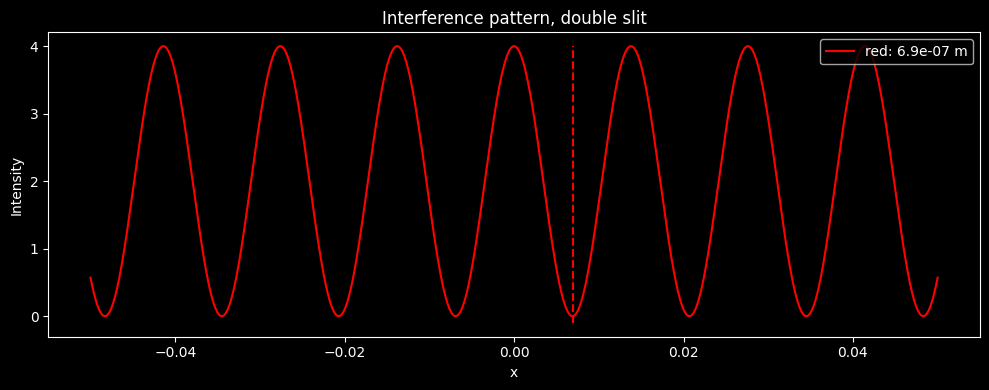

In [ ]:
double_slit_pattern(['red'])

#### Diffraction `grating` with narrow slits (point sources)

Now, we extend things a bit by including $N+1$ narrow slits, there are $N/2$ at positive $x$ direction and $N/2$ at negative $x$ direction, and one at $x=0$, where $N$ is an even number. Neighbouring slits are distance `d` apart

Similarly, for far field as $L \gg d,x$, the plane wave from the `mth` slit arriving at screen at location $x$ is expressed as

$$e^{ik\sin(\theta_m)x}\approx e^{ik\frac{md}{L}x}$$

We then sum `all` plane waves

$$\sum_{m=-N/2}^{N/2}e^{ik\frac{md}{L}x}$$

Using `geometric formula`

$$\sum_{m=0}^{n}ar^{m}=\frac{a(1-r^{n+1})}{1-r}$$

We have $a=1$, $r=e^{ik\frac{d}{L}x}$, and replace lower limit $-\frac{N}{2}$ with $0$, we have upper limit $\frac{N}{2}$ replaced by $N$, we have

$$\begin{align*}
\sum_{m=0}^{N}e^{ik\frac{\left(m-\frac{N}{2}\right)d}{L}x}=e^{-ik\frac{Nd}{2L}x}\cdot \sum_{m=0}^{N}e^{ik\frac{md}{L}x}&=\boxed{e^{-ik\frac{Nd}{2L}x}\cdot \sum_{m=0}^{N}\left(e^{ik\frac{d}{L}x}\right)^m}\\
&\text{(use geometric formula for the summation)}\\
&=e^{-ik\frac{Nd}{2L}x}\cdot \frac{1-e^{ik\left(N+1\right)\frac{d}{L}x}}{1-e^{ik\frac{d}{L}x}}\\
&\text{(split first exponential into two)}\\
&=e^{ik\frac{d}{2L}x}\cdot e^{-ik\frac{\left(N+1\right)d}{2L}x}\cdot \frac{1-e^{ik\left(N+1\right)\frac{d}{L}x}}{1-e^{ik\frac{d}{L}x}}\\
&=\frac{e^{ik\frac{d}{2L}x}}{e^{ik\frac{d}{2L}x}}\cdot \frac{e^{-ik\frac{\left(N+1\right)d}{2L}x}-e^{ik\frac{\left(N+1\right)d}{2L}x}}{e^{-ik\frac{d}{2L}x}-e^{ik\frac{d}{2L}x}}\\
&=\frac{\sin\left(k\frac{N+1}{2}\frac{d}{L}x\right)}{\sin\left(k\frac{d}{2L}x\right)}\\
&=\boxed{\frac{\sin\left((N+1)\gamma\right)}{\sin\gamma}}
\end{align*}$$

where $\gamma=\frac{1}{2}\frac{kd}{L}x$

In [ ]:
def gamma(wavelength, d=slit_d, L=slit_screen_l, x=x_1):
    return (2*np.pi/wavelength)*d*x/(2*L)

def many_slit_pattern(
    color_list,
    x=x_1,
    slit_d=slit_d,
    slit_screen_l=slit_screen_l,
    wavelength=wavelength,
    N = 8,
    print_spectrum_range=False
    ):
    if color_list is not None:
        fig_3, ax_3 = plt.subplots(figsize=(10,4))
    for color in color_list:
        pattern = (np.sin((N+1)*gamma(wavelength[color]))/np.sin(gamma(wavelength[color])))**2
        peak_distance = wavelength[color]*slit_screen_l/(slit_d)
        peak_half_width = wavelength[color]*slit_screen_l/((N+1)*slit_d)

        print(f'{color}: Peak width: {peak_half_width*2}, Half width: {peak_half_width}, Peak distance: {peak_distance}')
        ax_3.plot(x, pattern, color=color, label=f'{color}: {wavelength[color]} m')
        ax_3.plot([peak_half_width, peak_half_width], [-0.1,pattern.max()], color=color, ls='--') # peak half width
        ax_3.plot([peak_distance, peak_distance], [-0.1,pattern.max()], color=color, ls='-.') # peak distance

    wavelengths = [wavelength[color] for color in color_list]
    lambda_max = max(wavelengths)
    lambda_min = min(wavelengths)
    max_order = int(abs(x.min()) // (lambda_max*slit_screen_l/slit_d))
    if print_spectrum_range:
        print(max_order)
        for i in range(1, max_order+1):
          ax_3.plot([-i*lambda_min*slit_screen_l/slit_d, -i*lambda_max*slit_screen_l/slit_d], [pattern.max(), pattern.max()], 'c')

    ax_3.set_xlabel('x')
    ax_3.set_ylabel('Intensity')
    ax_3.legend(loc='upper right')
    ax_3.set_title('Interference pattern, many narrow slits')
    plt.tight_layout()
    plt.show()

red: Peak width: 0.0030666666666666663, Half width: 0.0015333333333333332, Peak distance: 0.0138
blue: Peak width: 0.0020888888888888884, Half width: 0.0010444444444444442, Peak distance: 0.0094


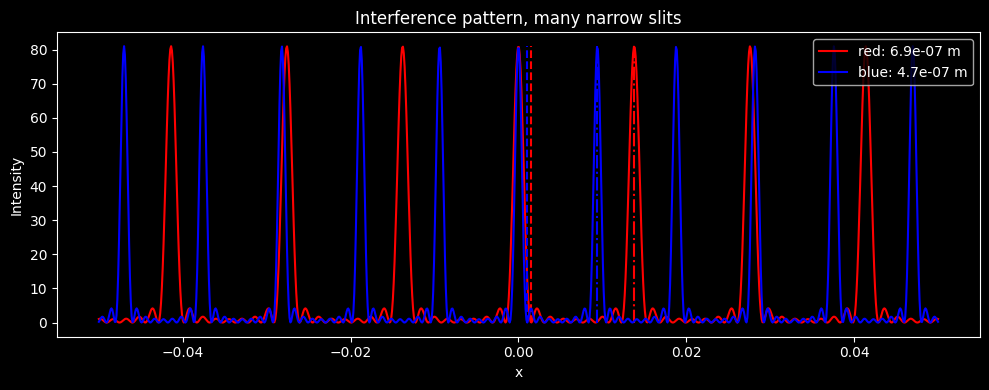

In [ ]:
many_slit_pattern(['red', 'blue'], N=8)

We see the maxima occur when the `denominator` is $0$, or $\gamma = n\cdot \pi$ (where n is `diffraction order`) which gives

$$\frac{1}{2}\frac{kd}{L}x=n\pi \Rightarrow x=n\frac{2\pi L}{kd}=n\frac{\lambda L}{d} \Rightarrow \Delta x =\boxed{\frac{\lambda L}{d}}$$

This is the same condition as found in double slit experiment. But here, it only gives `peak distance`, not `peak width`

The maxima have smaller width compared to peaks in double slit experiment, as it is determined by the zeros of the `numerator`

As this must exclude zeros of the denominator, therefore, period of zeros of numerator is peak `half width`

$$(N+1)\frac{1}{2}\frac{kd}{L}x=\left(n+\frac{1}{2}\right)\pi \Rightarrow x=\left(n+\frac{1}{2}\right)L\frac{2\pi}{(N+1)kd}=\left(n+\frac{1}{2}\right)\frac{\lambda L}{(N+1)d}$$

As a result, the `peak width` in diffraction grating is

$$\Delta x=\boxed{2\frac{\lambda L}{(N+1)d}}$$

which is `narrower` than `peak width` in double slit

$$\Delta x=\frac{\lambda L}{d}$$

If $N=1$, `peak width` in diffraction grating becomes the same as double slit `peak width`, as it should!

#### Diffraction grating with slits of `non-negligible` width

So far, we only consider slit with `negligible` width, so at each slit, only one point source is emitting light

We can extend the formula to consider slit of `non-negligible` width by including an `offset` term $s$ indicating a source that is $s$ away from the slit center

$$\begin{align*}
\sum_{m=0}^{N}e^{ik\frac{\left(m-\frac{N}{2}\right)d+s}{L}x}&=e^{ik\frac{s}{L}x}\sum_{m=0}^{N}e^{ik\frac{\left(m-\frac{N}{2}\right)d}{L}x}\\
&=e^{ik\frac{s}{L}x}\cdot \frac{\sin\left((N+1)\gamma\right)}{\sin\gamma}
\end{align*}$$

Now, if the `width` of slit is $b$, we can compute the integral to get the (more realistic) interference pattern at the screen

$$\begin{align*}
\int_{-\frac{b}{2}}^{\frac{b}{2}}\,e^{ik\frac{s}{L}x}\cdot \frac{\sin\left((N+1)\gamma\right)}{\sin\gamma}\,ds & =\frac{\sin\left((N+1)\gamma\right)}{\sin\gamma}\int_{-\frac{b}{2}}^{\frac{b}{2}}\,e^{ik\frac{s}{L}x}\,ds\\
&=\frac{\sin\left((N+1)\gamma\right)}{\sin\gamma}\cdot \frac{L}{ikx}\left(e^{ik\frac{b}{2L}x}-e^{-ik\frac{b}{2L}x}\right)\\
&=\frac{\sin\left((N+1)\gamma\right)}{\sin\gamma}\cdot \frac{L}{ikx}\cdot 2i \cdot \sin(\frac{kb}{2L}x)\\
&=b\cdot\frac{\sin\left((N+1)\gamma\right)}{\sin\gamma}\cdot \frac{\sin(\frac{kb}{2L}x)}{\frac{kb}{2L}x}\\
&=\boxed{b\cdot\frac{\sin\left((N+1)\gamma\right)}{\sin\gamma}\cdot \frac{\sin(\beta)}{\beta}}
\end{align*}$$

where

$$\beta=\frac{kb}{2L}x\approx \frac{kb}{2}\sin(\theta)$$

Therefore, for the beta pattern, the peaks occurs when $\beta=0$, and zeros at zeros for the numerator, except for the peak

$$\frac{kb}{2L}x=m\cdot \pi$$

$$\Delta x=\frac{2L\pi}{kb}=\boxed{\frac{\lambda L}{b}}$$

This gives `beta peak half width`  

`Beta peak width` is simply $2\Delta x$, or $\frac{2\lambda L}{b}$



We see that `realistic` diffracted field is the `product` of
* `single-finite-width-slit` field $b\cdot \frac{\sin(\beta)}{\beta}$. From this, we can see that far field is proportional to the fourier transform of the field at the source. Since source is a rectangle function, the fourier transform is a $sinc$ function. The proportion/scaling will be detailed in later notebook
* `multiple infinitesimally-thin-slits` field $\frac{\sin\left((N+1)\gamma\right)}{\sin\gamma}$. This follows fourier transform of a series of delta functions, and the output is also a series of delta functions (at maxima peaks). Here, as N is not infinite, so each delta function at screen has some width.

red: Peak width: 0.0030666666666666663, Half width: 0.0015333333333333332, Peak distance: 0.0138, Beta peak half width: 0.046000000000000006
yellow: Peak width: 0.0025777777777777774, Half width: 0.0012888888888888887, Peak distance: 0.0116, Beta peak half width: 0.03866666666666667
cyan: Peak width: 0.002177777777777777, Half width: 0.0010888888888888886, Peak distance: 0.0098, Beta peak half width: 0.03266666666666667


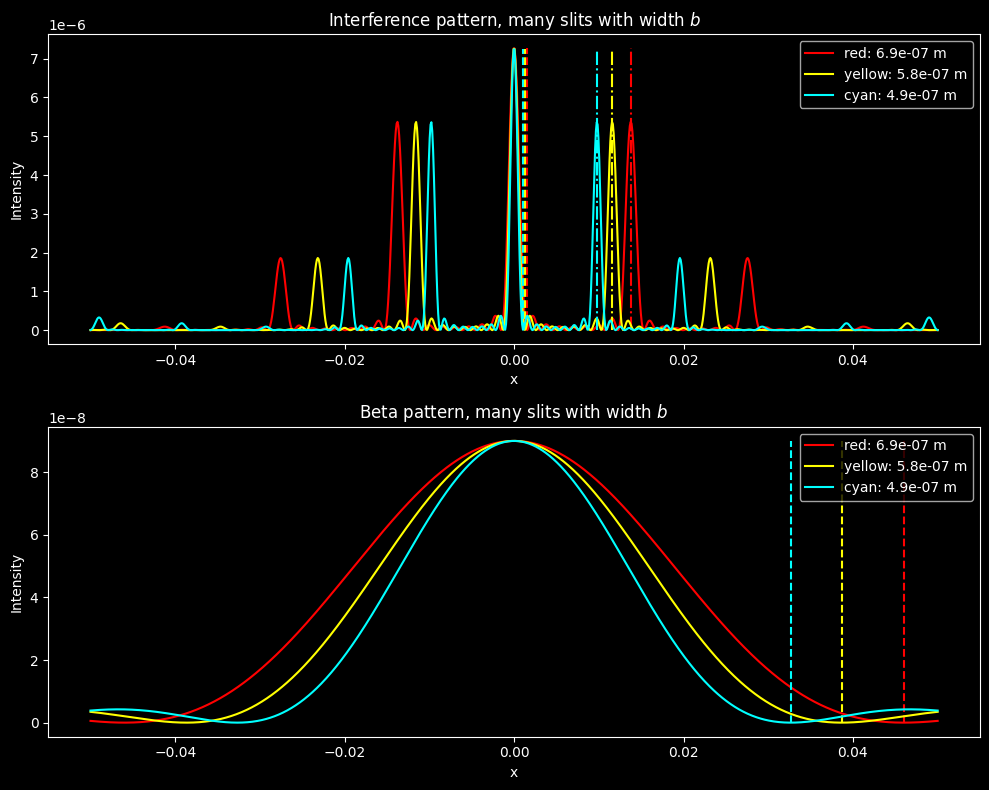

In [ ]:
slit_b = 3e-4 #

def beta(wavelength, b=slit_b, L=slit_screen_l, x=x_1):
    return (2*np.pi/wavelength)*b*x/(2*L)

def many_slit_pattern_width(
    color_list,
    x=x_1,
    slit_d=slit_d,
    slit_b=slit_b,
    slit_screen_l=slit_screen_l,
    wavelength=wavelength,
    N = 8
    ):
    if color_list is not None:
        fig_4, ax_4 = plt.subplots(nrows=2, figsize=(10,8))
    for color in color_list:
        gamma_pattern = (np.sin((N+1)*gamma(wavelength[color]))/np.sin(gamma(wavelength[color])))
        beta_pattern = (slit_b*np.sin(beta(wavelength[color]))/beta(wavelength[color]))
        pattern = (beta_pattern*gamma_pattern)**2

        peak_distance = wavelength[color]*slit_screen_l/(slit_d) # overall pattern
        peak_half_width = wavelength[color]*slit_screen_l/((N+1)*slit_d) # overall pattern

        beta_peak_width = 2*wavelength[color]*slit_screen_l/(slit_b) # beta pattern

        print(f'{color}: Peak width: {peak_half_width*2}, Half width: {peak_half_width}, Peak distance: {peak_distance}, Beta peak half width: {beta_peak_width/2}')
        ax_4[0].plot(x, pattern, color=color, label=f'{color}: {wavelength[color]} m')
        ax_4[0].plot([peak_half_width, peak_half_width], [0,pattern.max()], color=color, ls='--') # peak half width
        ax_4[0].plot([peak_distance, peak_distance], [0,pattern.max()], color=color, ls='-.') # peak distance
        ax_4[1].plot(x, beta_pattern**2, color=color, label=f'{color}: {wavelength[color]} m')
        ax_4[1].plot([beta_peak_width/2, beta_peak_width/2], [0,(beta_pattern**2).max()], color=color, ls='--') # beta peak half width

    ax_4[0].set_xlabel('x')
    ax_4[0].set_ylabel('Intensity')
    ax_4[0].legend(loc='upper right')
    ax_4[0].set_title('Interference pattern, many slits with width $b$')
    ax_4[1].set_xlabel('x')
    ax_4[1].set_ylabel('Intensity')
    ax_4[1].legend(loc='upper right')
    ax_4[1].set_title('Beta pattern, many slits with width $b$')
    plt.tight_layout()
    plt.show()

many_slit_pattern_width(['red', 'yellow', 'cyan'], N=8)

So, when slit width $\uparrow$, the beta pattern gets $\downarrow$ `narrower`

Summary

* The slit distance $d$. This determines the `distance` between interference `maxima`. Smaller $d$ means larger distance between maxima.
* The number of slits $N$. This determines the `width` of the interference `maxima`. Larger $N$ means narrower width of maxima.
* The slit width $b$. This determines the `envelope width` of the overall `diffraction pattern`. Larger $b$ means narrower envelope.


`Each order in the diffraction pattern corresponds to a spatial frequency component of the grating.`

#### Grating spectroscopy

Spectroscopy is one of the `applications` of diffraction grating

For many slits, location of $n$th `diffraction order` for light of wavelength $\lambda$ is given by

$$x=n\frac{\lambda L}{d}$$

For two wavelengths separated by $\Delta \lambda$, in order to resolve the two peaks at $n$th diffraction order, we require that the distance between these two peaks is no smaller than peak's half width, or

$$n\frac{\Delta \lambda L}{d}\geq \frac{\lambda L}{(N+1)d}$$

This gives `resolvance` or `chromatic resolving power`

$$\boxed{\frac{\lambda}{\Delta \lambda} \leq n\cdot(N+1)}$$

So, at first look, when
* diffraction order $n$ $\uparrow$ (which `magnifies` difference in wavelength)
* or number of slits $\uparrow$ (which makes peaks `narrower`)

for same $\lambda$, lower bound of separable $\Delta \lambda$ becomes `smaller`, meaning `higher resolution` separation is achievable, and of higher quality the spectroscopy becomes

However, there is still an `issue` with spectroscopy, that is, peaks of `different diffraction orders` will overlap among light of different wavelength. For example, the $n$th peak of larger $\lambda$ (e.g., red) may overlap with $(n+1)$th peak of smaller $\lambda$ (e.g., blue)

If we consider $\lambda_{min}$ and $\lambda_{max}$ for certain application, then we want $n$th diffraction location of $\lambda_{max}$ to be smaller than $(n+1)$th diffraction location of $\lambda_{min}$

$$(n+1)\frac{\lambda_{min} \,L}{d}\geq n\frac{\lambda_{max} \,L}{d}$$

and

$$\boxed{\lambda_{max}-\lambda_{min}\leq \frac{\lambda_{min}}{n}}$$

We call this metric `free spectral range, FSR`, which indicates minimum allowable spectral range for $n$th diffraction order

From the image below, we can see 3rd order of blue peak starts to overlap 2nd order of red peak

red: Peak width: 0.0030666666666666663, Half width: 0.0015333333333333332, Peak distance: 0.0138
blue: Peak width: 0.0020888888888888884, Half width: 0.0010444444444444442, Peak distance: 0.0094
3


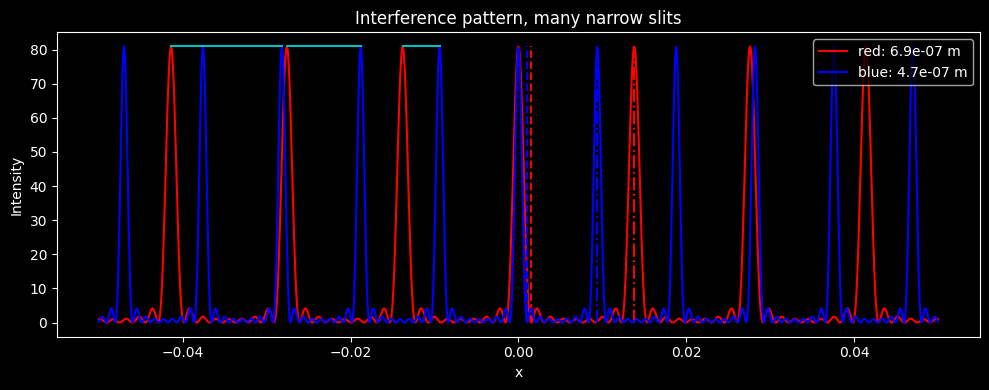

In [ ]:
many_slit_pattern(['red', 'blue'], N=8, print_spectrum_range=True)

We can compute for $n=2$

In [ ]:
fsr = wavelength['blue']/2
print(f'FSR for 2nd diffraction order: {fsr}')
print(f'Difference in wavelength between red and blue: {wavelength["red"]-wavelength["blue"]}')

FSR for 2nd diffraction order: 2.35e-07
Difference in wavelength between red and blue: 2.1999999999999996e-07


#### `Numerical aperture`

If a lens is used to collect the diffracted light, to see the grating, the lens must capture the `1st order diffraction pattern`

Recall for diffraction grating, the maxima should satisfy

$$d\sin\theta=m\cdot \lambda$$

Or

$$\sin\theta\approx \frac{x}{L}=m\frac{\lambda}{d}$$

where $\theta$ is the `angle` between a ray leaving the grating and the horizontal optical axis

For the 1st order diffraction

$$\sin\theta=\frac{\lambda}{d}$$

Suppose the lens has a certain diameter and a certain distance from the grating, such that the `largest ray angle the lens can capture` is $\alpha$, we define `numerical aperture` (NA) as

$$\boxed{\text{NA}=\sin{\alpha}}\leq1$$

As a result, to ensure the lens capture the 1st diffraction order

$$\sin\theta = \frac{\lambda}{d}\leq \sin\alpha = \text{NA}$$

Or

$$\boxed{d\geq \frac{\lambda}{\text{NA}}}\geq \lambda$$

In other words, the `smallest feature` that an imaging system can image is $\frac{\lambda}{\text{NA}}$. This is called the `diffraction limit`

If $d=\lambda$, then $\sin\alpha = 1$, meaing the 1st diffraciton order is in the direction `along the grating surface`

Similar to total internal reflection, if we have $d<\lambda$, then no ray will propagate and we will have an `evanescent field` at the output of the grating, containing `features` smaller than $\lambda$

To "beat" the diffraction limit, one way is to reduce $\lambda$ by `immersing` grating into medium with `high refractive index`